# CSE2530 Computational Intelligence
## Assignment 2: Artificial Neural Networks

<div style="background-color:#f1be3e">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group   |           40          |
|------------|----------------------|
| Jacek Obiała  |        6185665       |
| Michał Szelejewski  |        6219128       |
| Student C  |        XXXXXXX       |
| Student D  |        XXXXXXX       |

</div>

#### Imports

In [12]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [13]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

OR
[0, 0], 0
[0, 1], 1
[1, 0], 1
[1, 1], 1


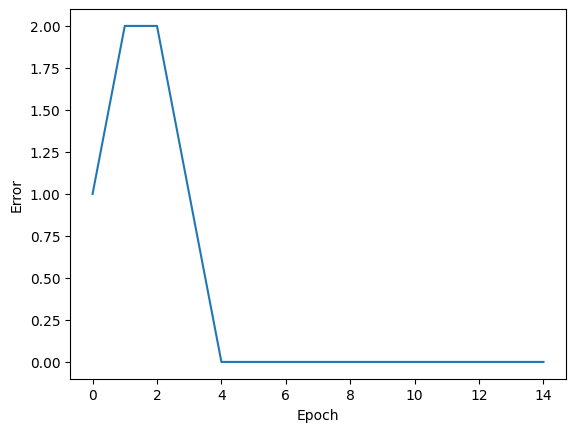

AND
[0, 0], 0
[0, 1], 0
[1, 0], 0
[1, 1], 1


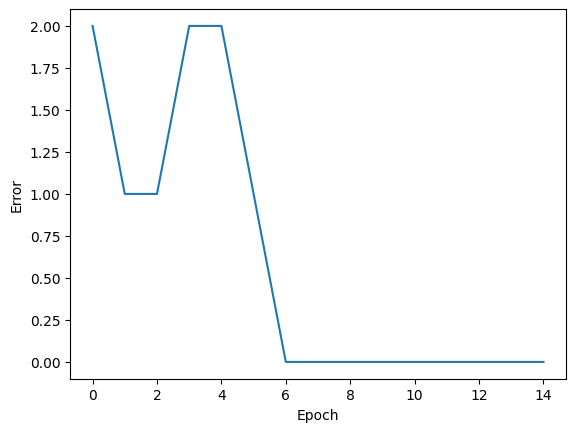

XOR
[0, 0], 1
[0, 1], 1
[1, 0], 0
[1, 1], 0


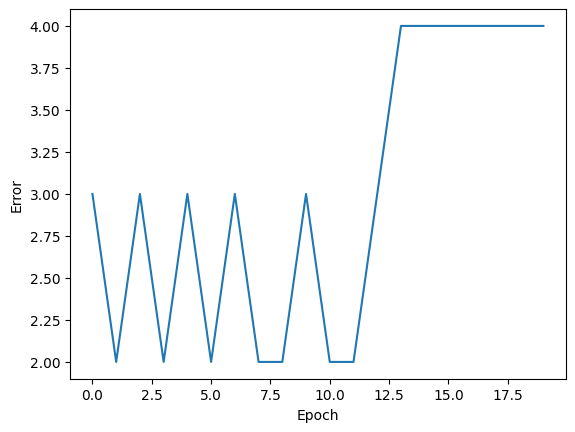

In [14]:
# A single perceptron stores 3 values - weight, bias, learning rate (w, b, l)
class perceptron:
    def __init__(self, dims, l = 0.1):
        self.w = np.random.randn(dims)
        self.b = 0.0
        self.l = l

    def predict(self, x):
        if np.dot(self.w, x) + self.b > 0:
            return 1
        else:
            return 0
            
    def train(self, x, y, epochs):
        errors = []
        for i in range(epochs):
            error_per_epoch = 0
            for j in range(len(x)):
                predicted = self.predict(x[j])
                error = y[j] - predicted
                self.w += self.l * error * np.array(x[j]) # update params
                self.b += self.l * error # update params
                error_per_epoch += abs(error)
            errors.append(error_per_epoch)
        return errors

points = ([[0, 0],[0, 1],[1, 0],[1, 1]])
AND = [0, 0, 0, 1]
OR = [0, 1, 1, 1]
XOR = [0, 1, 1, 0]
perceptron = perceptron(2) # we will use only 2 perceptrons


print("OR")
error = perceptron.train(points, OR, 15)
for x in points:
    print(str(x) + ", " + str(perceptron.predict(x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


print("AND")
error = perceptron.train(points, AND, 15)
for x in points:
    print(str(x) + ", " + str(perceptron.predict(x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

    
print("XOR")
error = perceptron.train(points, XOR, 20)
for x in points:
    print(str(x) + ", " + str(perceptron.predict(x)))
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

The first and second diagrams (OR and AND respectively) show that, as more epochs occur, the error aproaches 0. This means that the a single perceptron is sufficient to model the OR and AND gates. This makes sense, because these gates can be discriminated with a linear function. The XOR gate on the other hand ends up with an error of 4.00 after a couple of epochs. The perceptron could never model the XOR gate correctly. This shows that an XOR gate cannot be discriminated using a linear classifier and that we need a more complex model for it.

#### Question 2

We need 10 input neurons, as we have 10 features and each input is 1 feature.

#### Question 3

We receive 7 output neurons each one for seperate class as there are 7 output classes.

#### Question 4

We decide on 2 layers as it is some more complex classifier but it is not too much to overfit the data. First layer with 10 neurons and the second one with 7 neurons. We think it might be enough to plot the complexity of the classifier but not overfit on the data.

#### Question 5

We will use the softmax function for the output layer, since it works well for multiclass classification problems with mutually exclusive labels. For hidden layers we will use ReLU as it is simple and is going to be faster to compute in comparison to other more complex activation functions.

#### Question 6

We used online tool to create this diagram: https://alexlenail.me/NN-SVG/index.html
![network_diagram](network_diagram.png)


### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [15]:
class Linear:
    def __init__(self, in_features, out_features):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """

        self.weight = ...
        self.bias = ...

        self.cache = None
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.

        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """

        pass
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
       
        pass

**Activation functions**

You also need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [16]:
class Activation:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """

        pass
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        pass

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [17]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        
        pass
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        pass
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        
        pass

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [18]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """

    pass

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [19]:
def train(net, inputs, labels, criterion, lr):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step. 
    """
    
    pass

#### Question 7

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 8

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 9

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 10

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.4 Optimization

#### Question 11

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.5 Evaluation

#### Question 13

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 14

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 17

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

_Write your answer here._

</div>

#### Question 19

<div style="background-color:#f1be3e">

_Write your answer here._

</div>

### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

</div>

#### Question 21

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

</div>

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

</div>

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**

</div>